<a href="https://colab.research.google.com/github/Laura-Jimena/Talento_Tech2/blob/main/PANDAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Talento tech/hurto_a_persona.csv")
df

<ipython-input-19-d1213a067936>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Talento tech/hurto_a_persona.csv")


,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T01:00:00.000-05:00,1.0,6.299703,-75.582016,Mujer,33,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Doce de Octubre,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
1,2017-01-01T15:00:00.000-05:00,1.0,6.250917,-75.566160,Mujer,26,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
2,2017-01-01T14:00:00.000-05:00,1.0,6.274836,-75.554909,Hombre,30,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
3,2017-01-01T16:00:00.000-05:00,1.0,6.276236,-75.553533,Hombre,37,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
4,2017-01-01T16:00:00.000-05:00,1.0,6.250339,-75.586914,Hombre,87,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Billetera,Prendas de vestir y accesorios,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326484,2023-11-30T21:30:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326485,2023-11-30T23:00:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Poblado,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326486,2023-11-30T23:00:00.000-05:00,1.0,NaN,NaN,Hombre,40,Sin dato,Sin dato,Sin dato,Sin dato,...,Bar o cantina,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326487,2023-11-30T23:20:00.000-05:00,1.0,NaN,NaN,Hombre,29,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00


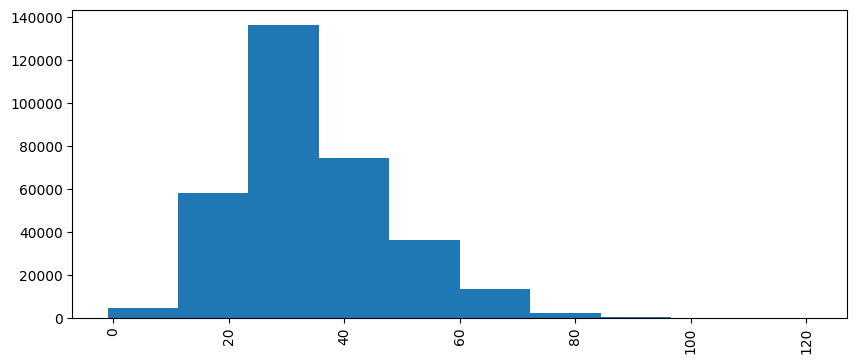

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(df["edad"])
plt.xticks(rotation=90)
plt.show()

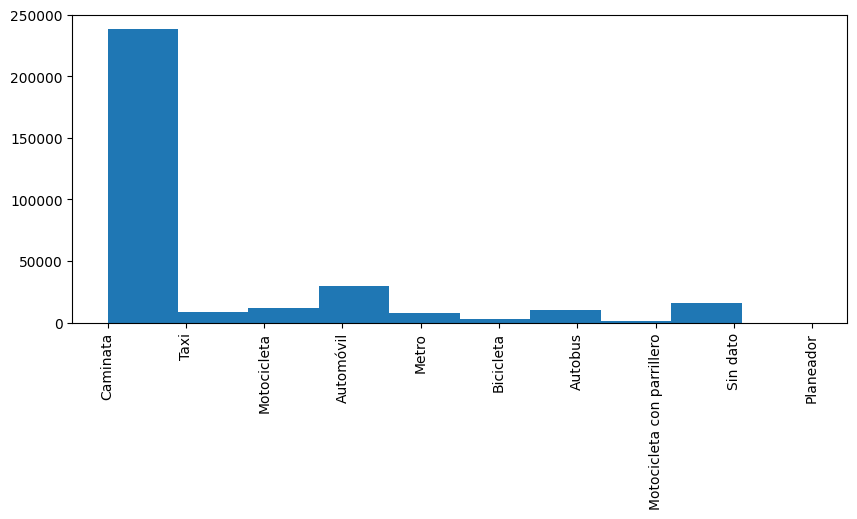

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(df["medio_transporte"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install fuzzywuzzy

In [ ]:
medio=df["medio_transporte"].unique()
medio.sort()
medio

array(['Autobus', 'Automóvil', 'Bicicleta', 'Caminata', 'Metro',
       'Motocicleta', 'Motocicleta con parrillero', 'Planeador',
       'Sin dato', 'Taxi'], dtype=object)

In [ ]:
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

In [ ]:
matches=fuzzywuzzy.process.extract("Planeador", medio, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio) # limit=> cantidad de resultados que quiero (max)
matches

[('Planeador', 100),
 ('Caminata', 35),
 ('Metro', 29),
 ('Autobus', 25),
 ('Sin dato', 24),
 ('Motocicleta con parrillero', 23),
 ('Bicicleta', 22),
 ('Motocicleta', 20),
 ('Taxi', 15),
 ('Automóvil', 12)]

In [ ]:
df_medio=df.groupby("medio_transporte").count()
df_medio

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
medio_transporte,,,,,,,,,,,,,,,,,,,,,
Autobus,10531,10531,9846,9846,10531,10531,10531,10531,10531,10531,...,10531,10531,10531,10531,10531,10531,10531,10531,10531,10531
Automóvil,29972,29972,27068,27068,29972,29972,29972,29972,29972,29972,...,29972,29972,29972,29972,29972,29972,29972,29972,29972,29972
Bicicleta,2847,2847,2649,2649,2847,2847,2847,2847,2847,2847,...,2847,2847,2847,2847,2847,2847,2847,2847,2847,2847
Caminata,238146,238146,207436,207436,238146,238146,238146,238146,238146,238146,...,238146,238146,238146,238146,238146,238146,238146,238146,238146,238146
Metro,7711,7711,6897,6897,7711,7711,7711,7711,7711,7711,...,7711,7711,7711,7711,7711,7711,7711,7711,7711,7711
Motocicleta,11728,11728,10702,10702,11728,11728,11728,11728,11728,11728,...,11728,11728,11728,11728,11728,11728,11728,11728,11728,11728
Motocicleta con parrillero,1150,1150,1114,1114,1150,1150,1150,1150,1150,1150,...,1150,1150,1150,1150,1150,1150,1150,1150,1150,1150
Planeador,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Sin dato,15612,15612,10970,10970,15612,15612,15612,15612,15612,15612,...,15612,15612,15612,15612,15612,15612,15612,15612,15612,15612


In [ ]:
df[df["medio_transporte"]=="Planeador"]

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
18332,2017-08-09T00:30:00.000-05:00,1.0,6.208773,-75.568194,Hombre,28,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parque,Poblado,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
18372,2017-08-09T00:30:00.000-05:00,1.0,6.208773,-75.568194,Hombre,28,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parque,Poblado,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
45552,2017-11-28T07:00:00.000-05:00,1.0,6.217739,-75.586662,Mujer,26,Divorciado(a),Sin dato,Sin dato,Sin dato,...,Aeropuerto,Belén,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
45553,2017-11-28T09:00:00.000-05:00,1.0,6.216197,-75.589291,Mujer,26,Divorciado(a),Sin dato,Sin dato,Sin dato,...,Aeropuerto,Belén,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
101312,2016-05-07T14:00:00.000-05:00,1.0,6.221405,-75.588510,Mujer,42,Casado(a),Sin dato,Sin dato,Sin dato,...,Aeropuerto,Belén,Maletín,Otros elementos,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
124205,2019-04-06T13:00:00.000-05:00,1.0,6.249886,-75.570742,Mujer,27,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Local comercial,Candelaria,Sin dato tecnología,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
181394,2020-10-27T11:30:00.000-05:00,1.0,6.220831,-75.588514,Mujer,34,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Aeropuerto,Belén,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
182543,2020-11-10T09:30:00.000-05:00,1.0,6.249718,-75.588765,Mujer,63,Casado(a),Sin dato,Sin dato,Sin dato,...,Paradero de bus,Laureles,Celular,Tecnología,Mercancía,-1,Azul,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
221100,2018-10-25T06:40:00.000-05:00,1.0,6.239003,-75.571690,Mujer,31,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,Oro,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
225254,2021-01-04T15:00:00.000-05:00,1.0,6.219120,-75.586050,Hombre,24,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Belén,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Caminata'),
  Text(1, 0, 'Taxi'),
  Text(2, 0, 'Motocicleta'),
  Text(3, 0, 'Automóvil'),
  Text(4, 0, 'Metro'),
  Text(5, 0, 'Bicicleta'),
  Text(6, 0, 'Autobus'),
  Text(7, 0, 'Motocicleta con parrillero'),
  Text(8, 0, 'Sin dato'),
  Text(9, 0, 'Planeador')])

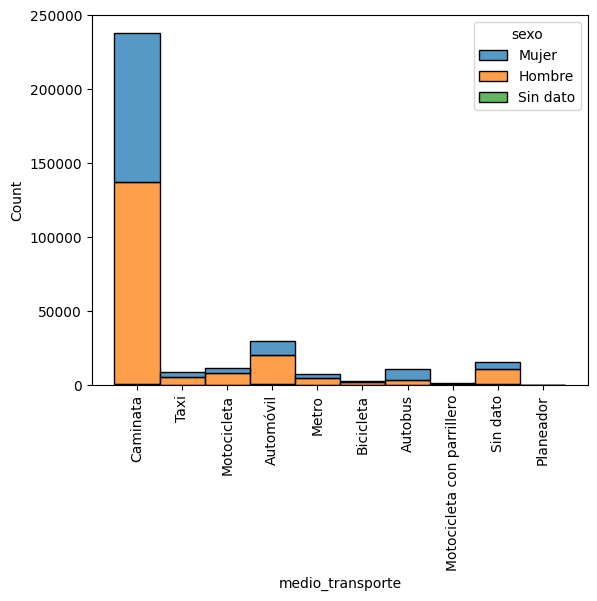

In [ ]:
sns.histplot(data=df,
  x="medio_transporte",             #Datos del ejex
  hue="sexo",                       #Categorias
  multiple="stack")                 #Categorias que visualizo
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Caminata'),
  Text(1, 0, 'Taxi'),
  Text(2, 0, 'Motocicleta'),
  Text(3, 0, 'Automóvil'),
  Text(4, 0, 'Metro'),
  Text(5, 0, 'Bicicleta'),
  Text(6, 0, 'Autobus'),
  Text(7, 0, 'Motocicleta con parrillero'),
  Text(8, 0, 'Sin dato'),
  Text(9, 0, 'Planeador')])

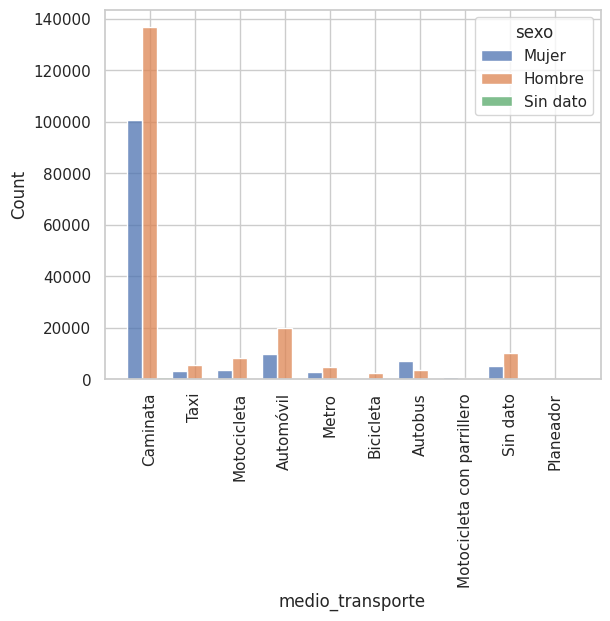

In [ ]:
sns.histplot(data=df,
  x="medio_transporte",             #Datos del ejex
  hue="sexo",                       #Categorias
  multiple="dodge")                 #Categorias que visualizo
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Caminata'),
  Text(1, 0, 'Taxi'),
  Text(2, 0, 'Motocicleta'),
  Text(3, 0, 'Automóvil'),
  Text(4, 0, 'Metro'),
  Text(5, 0, 'Bicicleta'),
  Text(6, 0, 'Autobus'),
  Text(7, 0, 'Motocicleta con parrillero'),
  Text(8, 0, 'Sin dato'),
  Text(9, 0, 'Planeador')])

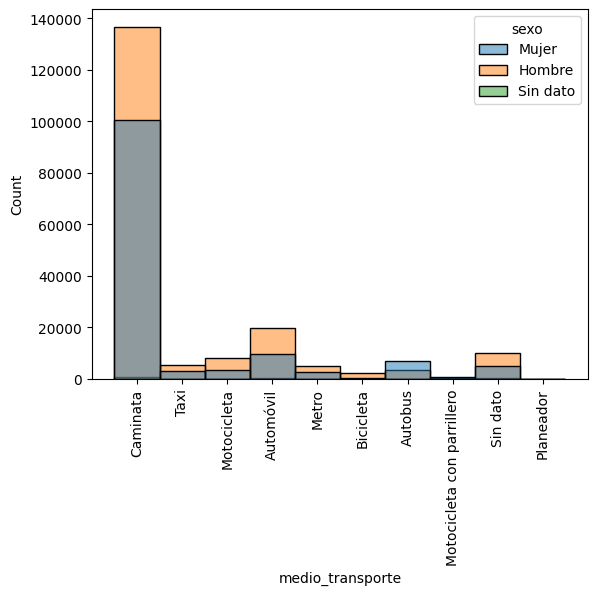

In [ ]:
sns.histplot(data=df,
  x="medio_transporte",             #Datos del ejex
  hue="sexo",                       #Categorias
  multiple="layer")                 #Categorias que visualizo
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Caminata'),
  Text(1, 0, 'Taxi'),
  Text(2, 0, 'Motocicleta'),
  Text(3, 0, 'Automóvil'),
  Text(4, 0, 'Metro'),
  Text(5, 0, 'Bicicleta'),
  Text(6, 0, 'Autobus'),
  Text(7, 0, 'Motocicleta con parrillero'),
  Text(8, 0, 'Sin dato'),
  Text(9, 0, 'Planeador')])

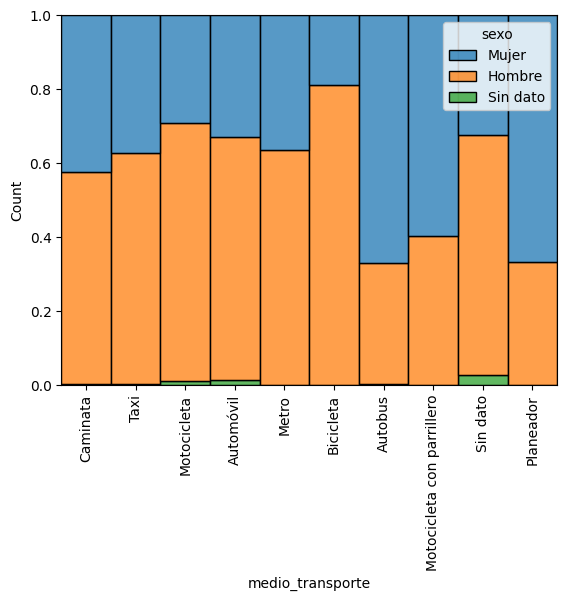

In [ ]:
sns.histplot(data=df,
  x="medio_transporte",             #Datos del ejex
  hue="sexo",                       #Categorias
  multiple="fill")                 #Categorias que visualizo
plt.xticks(rotation=90)

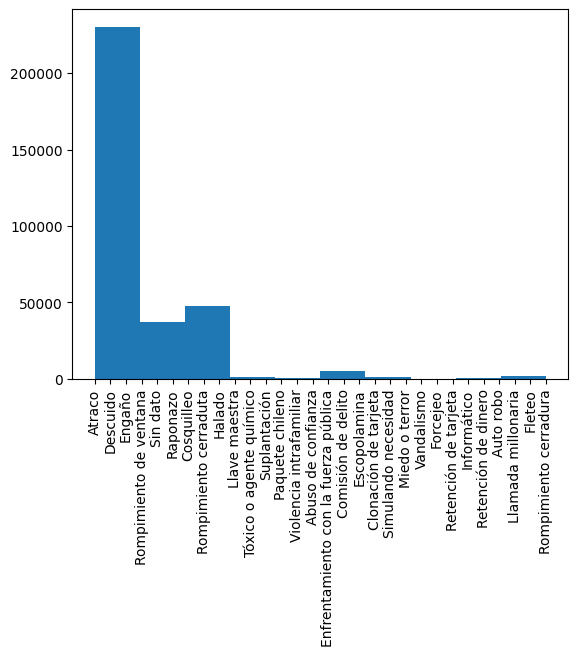

In [ ]:
plt.hist(df["modalidad"])                 #Categorias que visualizo
plt.xticks(rotation=90)
plt.show()

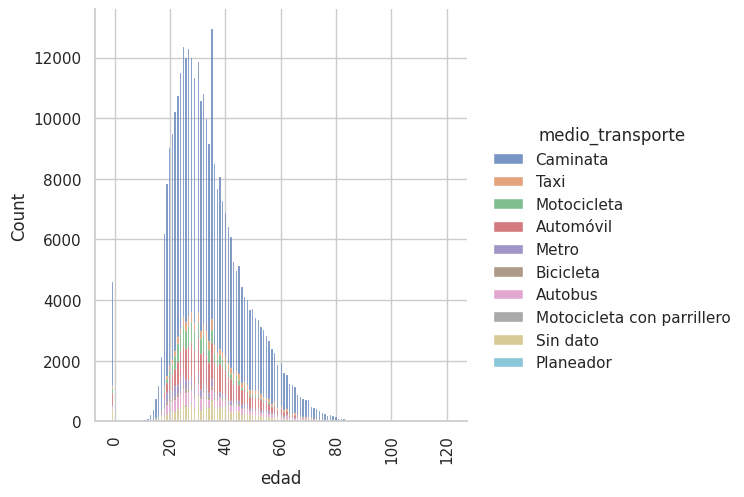

In [ ]:
sns.displot(data=df,
  x="edad",             #Datos del ejex
  hue="medio_transporte",                       #Categorias
  multiple="stack")                 #Categorias que visualizo
plt.xticks(rotation=90)
plt.show()

,fecha_hecho,cantidad,latitud,longitud,sexo,estado_civil,grupo_actor,actividad_delictiva,parentesco,ocupacion,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
edad,,,,,,,,,,,,,,,,,,,,,
-1,4589,4589,3534,3534,4589,4589,4589,4589,4589,4589,...,4589,4589,4589,4589,4589,4589,4589,4589,4589,4589
1,12,12,11,11,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2,25,25,22,22,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
3,11,11,6,6,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
4,10,10,8,8,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,3,3,2,2,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
94,4,4,3,3,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
95,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df[(df["edad"]>45) & (df["edad"]<50)]

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
62,2017-01-02T20:00:00.000-05:00,1.0,6.271405,-75.569726,Mujer,49,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Parque,Aranjuez,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
64,2017-01-02T20:15:00.000-05:00,1.0,6.241895,-75.553364,Mujer,47,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Buenos Aires,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
67,2017-01-02T12:30:00.000-05:00,1.0,6.243430,-75.566546,Hombre,46,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
68,2017-01-02T00:00:00.000-05:00,1.0,6.183063,-75.567977,Mujer,48,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Poblado,Accesorios prendas de vestir,Prendas de vestir y accesorios,Mercancía,-1,Café,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
69,2017-01-02T16:00:00.000-05:00,1.0,6.291827,-75.572548,Mujer,48,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Castilla,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326405,2023-11-28T18:00:00.000-05:00,1.0,NaN,NaN,Mujer,46,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326406,2023-11-28T18:00:00.000-05:00,1.0,NaN,NaN,Hombre,48,Sin dato,Sin dato,Sin dato,Sin dato,...,Estación del Metro,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326436,2023-11-29T11:30:00.000-05:00,1.0,NaN,NaN,Mujer,46,Sin dato,Sin dato,Sin dato,Sin dato,...,Casa o apartamento,Castilla,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00
326456,2023-11-30T02:39:00.000-05:00,1.0,NaN,NaN,Mujer,47,Sin dato,Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Sin dato,Sin dato,Sin dato,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:07:03.000-05:00


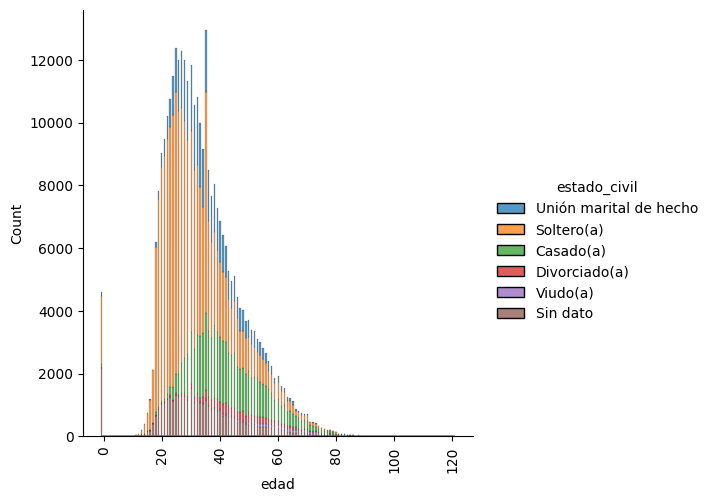

In [ ]:
sns.displot(data=df,
  x="edad",             #Datos del ejex
  hue="estado_civil",                       #Categorias
  multiple="stack")                 #Categorias que visualizo
plt.xticks(rotation=90)
plt.savefig("graf.svg")
plt.show()

<ipython-input-53-54f40a614ca2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


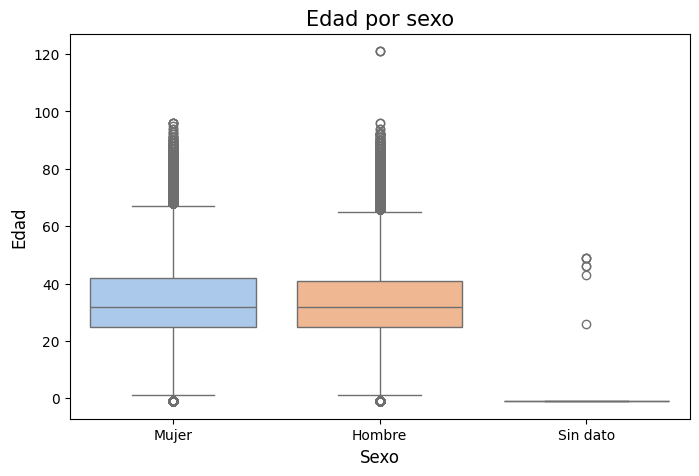

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=df["sexo"],
    y=df["edad"],
    palette="pastel"
)
plt.title("Edad por sexo", fontsize=15)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.savefig("grafic.svg")
plt.show()

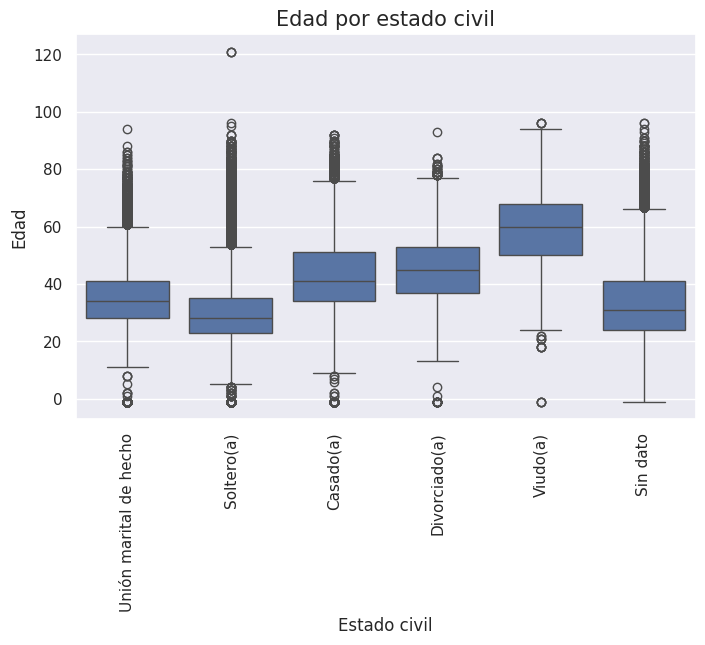

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=df["estado_civil"],
    y=df["edad"],
    palette="pastel"
)
plt.title("Edad por estado civil", fontsize=15)
plt.xlabel("Estado civil", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.savefig("grafic.svg")
plt.xticks(rotation=90)
plt.show()

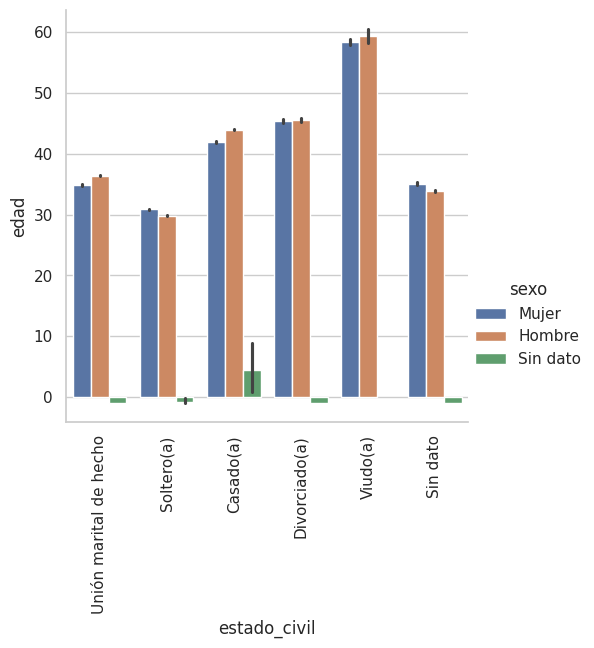

In [ ]:
sns.catplot(data=df, x="estado_civil", y="edad",hue="sexo", kind="bar")
plt.xticks(rotation=90)
plt.savefig("grafic.svg")
plt.show()


<Figure size 800x2000 with 0 Axes>

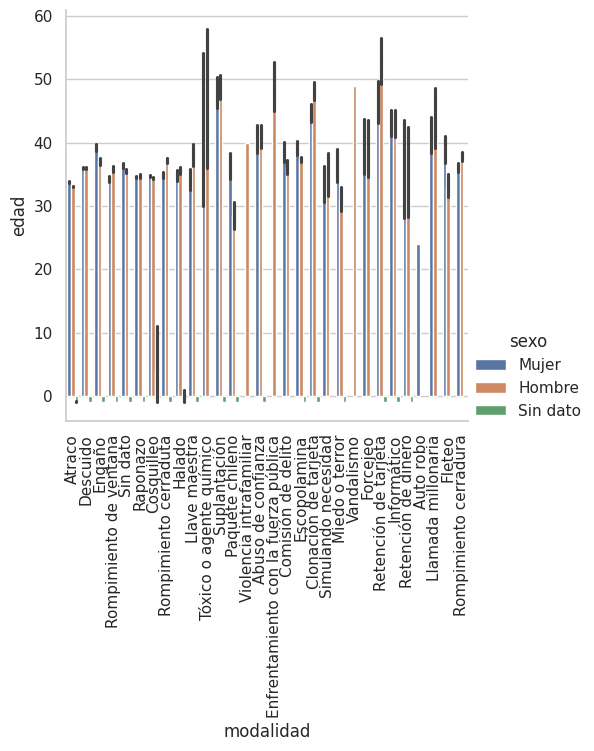

In [ ]:
plt.figure(figsize=(8,20))
sns.catplot(data=df, x="modalidad", y="edad",hue="sexo", kind="bar")
plt.xticks(rotation=90)
plt.savefig("grafic.svg")
plt.show()

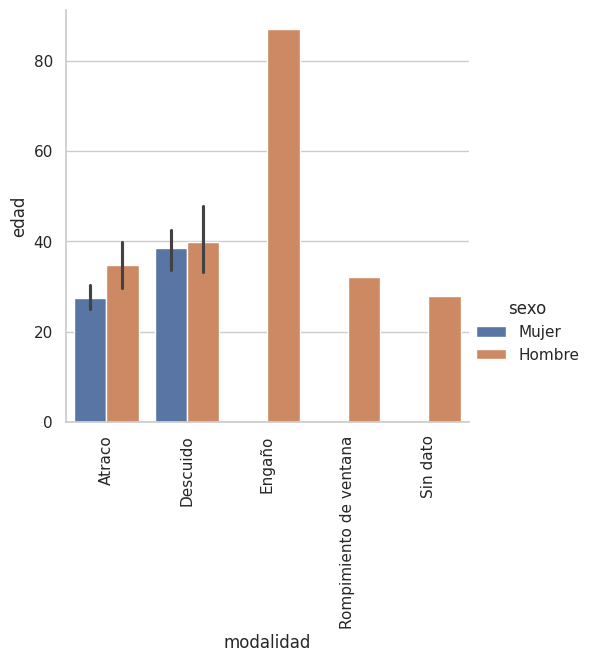

In [ ]:
sns.catplot(data=df.head(50), x="modalidad", y="edad",hue="sexo", kind="bar")
plt.xticks(rotation=90)
plt.savefig("grafic.svg")
plt.show()